In [1]:
#Import nrcessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
data=pd.DataFrame({"study_hr" : [3,5,2,7,4,6,1,3,5,4],"score" : [75,82,69,88,78,85,62,72,80,76]})

In [3]:
print(data)

   study_hr  score
0         3     75
1         5     82
2         2     69
3         7     88
4         4     78
5         6     85
6         1     62
7         3     72
8         5     80
9         4     76


In [4]:
# let's visualize the data.

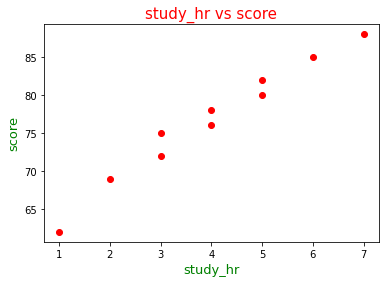

In [5]:
plt.scatter(data["study_hr"],data["score"],color='red')
plt.xlabel("study_hr",color='green', fontsize=13)
plt.ylabel("score",color='green', fontsize=13)
plt.title("study_hr vs score",color='red', fontsize=15)
plt.show()

In [6]:
## Splits the data

In [7]:
x=pd.DataFrame(data["study_hr"])
y=data["score"]

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3)

In [8]:
print(x_train)
print("-------------------")
print(y_train)

   study_hr
9         4
7         3
0         3
1         5
6         1
4         4
3         7
-------------------
9    76
7    72
0    75
1    82
6    62
4    78
3    88
Name: score, dtype: int64


In [9]:
print(x_test)
print("-------------------")
print(y_test)

   study_hr
8         5
2         2
5         6
-------------------
8    80
2    69
5    85
Name: score, dtype: int64


In [10]:
## There is no need of data preprocessing. so let's directly dive into Model creation..

In [11]:
model=LinearRegression()

model.fit(x_train,y_train)    # As i fit the x_train and y_train, it helps model to understand the pattern of data...
                              # now the model is well trained.

LinearRegression()

In [12]:
y_pred=model.predict(x_test)
y_pred                                                    #Preficted score using model

array([81.02739726, 68.20547945, 85.30136986])

In [13]:
np.array(y_test)                                          # Actual score

array([80, 69, 85], dtype=int64)

## Visuaization of data points & Regression Line

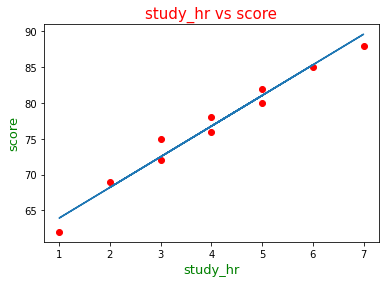

In [14]:
plt.scatter(data["study_hr"],data["score"],color='red')

plt.plot(data["study_hr"],model.predict(x),label="Regression Line")
plt.xlabel("study_hr",color='green', fontsize=13)
plt.ylabel("score",color='green', fontsize=13)
plt.title("study_hr vs score",color='red', fontsize=15)
plt.show()

In [15]:
slope = model.coef_[0]
Intercept = model.intercept_

print('slope:', slope)
print('Intercept:',Intercept)

slope: 4.273972602739725
Intercept: 59.65753424657534


## Model Evaluation

In [16]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.5925439419528374
R-squared: 0.9867340908518022


## Visualization of the predicted_score

In [17]:
y_pred=(slope*x)+Intercept

In [18]:
new_hrs= pd.DataFrame([8,9,10,12,15])    #The model expects a 2D array with shape (n_samples, n_features) & df is a 2d object
# or, new_hrs=np.array([[8],[9],[10],[12],[15]])
predicted_score=model.predict(new_hrs)

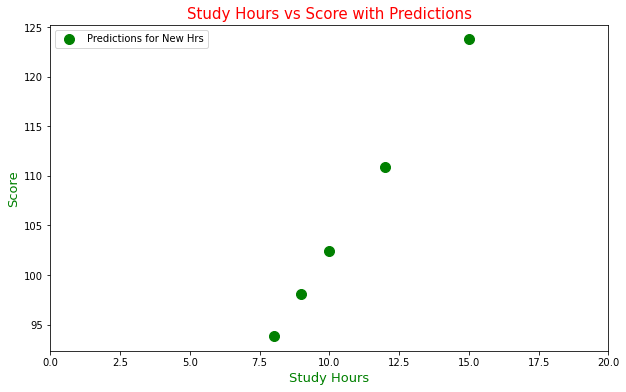

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(new_hrs, predicted_score, color='green', marker='o', s=100, label='Predictions for New Hrs')
plt.xlim(0,20,1)  
plt.xlabel('Study Hours',color='green', fontsize=13)
plt.ylabel('Score',color='green', fontsize=13)
plt.title('Study Hours vs Score with Predictions',color='red', fontsize=15)
plt.legend()
plt.show()